In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [8]:
#To understand the dataset, we check the basic statistics and data types in it: 
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [10]:
# Check for missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
#To Standardize column names for analysis:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [14]:
#To Convert categorical variables to numerical: 
categorical_cols = df.select_dtypes(include=['object']).columns
df=pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
# Normalize numerical columns if needed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

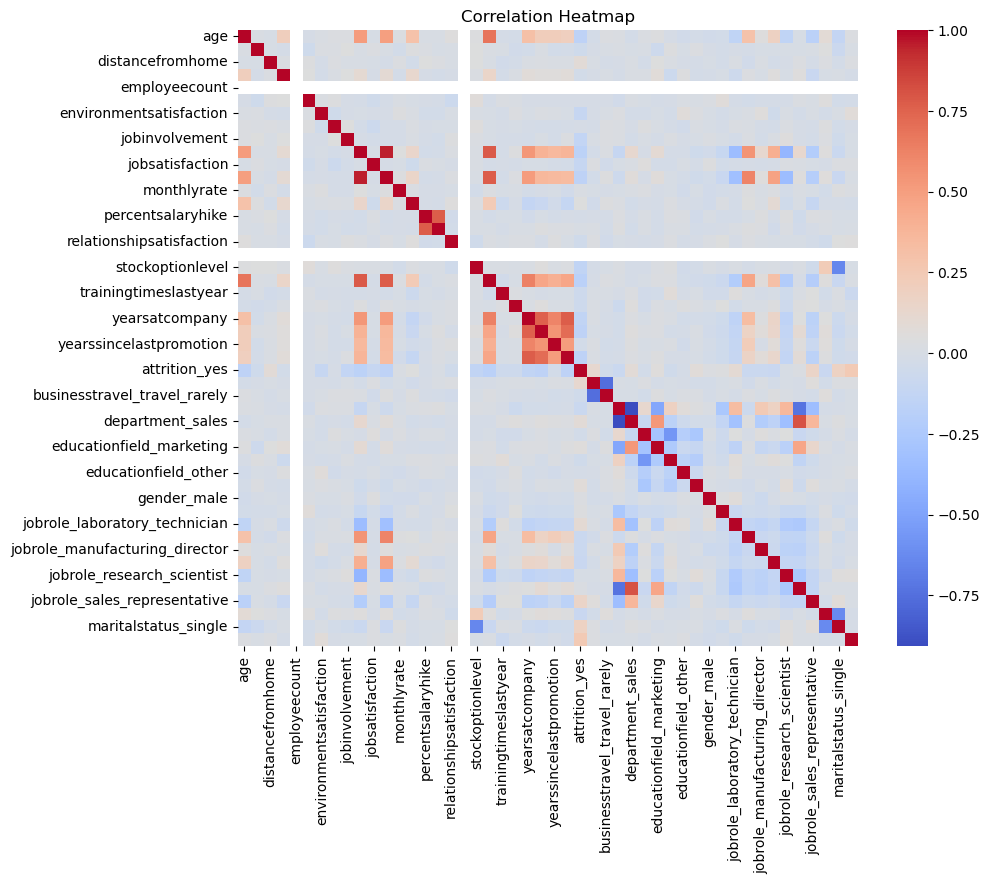

In [84]:
#To Perform exploratory data analysis (EDA) we import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

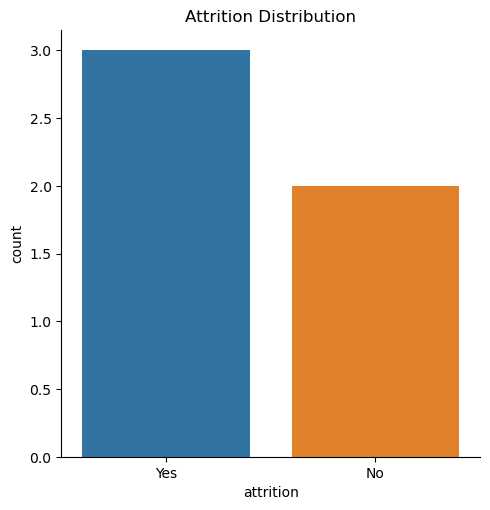

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.catplot(x="attrition", kind="count", data=df)
plt.title("Attrition Distribution")
plt.show()


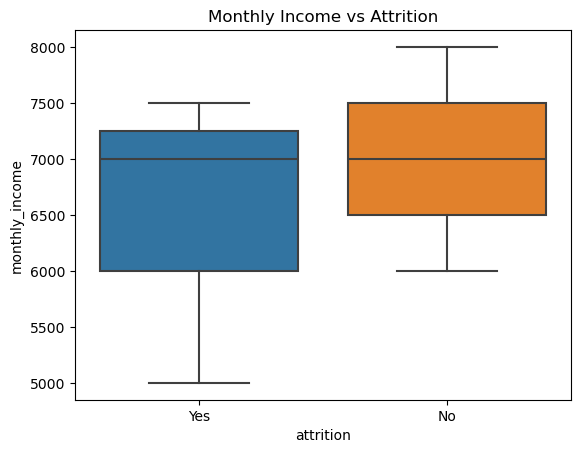

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x="attrition", y="monthly_income", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

In [116]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [122]:

# Group data by attrition status
attrition_status = df.groupby("Attrition")

# Calculate averages
average_tenure = attrition_status["YearsAtCompany"].mean()
average_income = attrition_status["MonthlyIncome"].mean()
average_satisfaction = attrition_status["JobSatisfaction"].mean()

# Display results
print("Average Tenure:\n", average_tenure)
print("Average Income:\n", average_income)
print("Average Satisfaction:\n", average_satisfaction)

Average Tenure:
 Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64
Average Income:
 Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64
Average Satisfaction:
 Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64


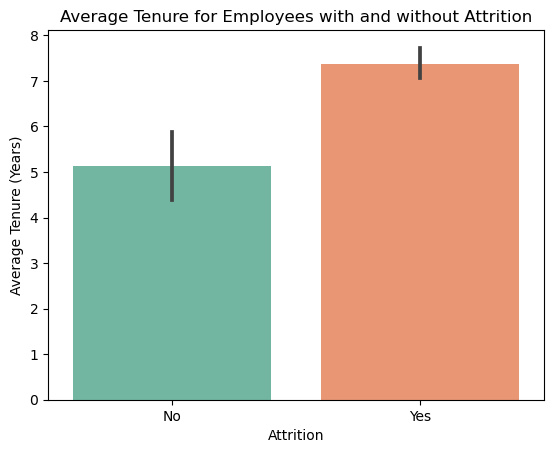

In [126]:
# Visualize average tenure
sns.barplot(x=df['Attrition'], y=df['YearsAtCompany'], estimator='mean', palette='Set2')
plt.title('Average Tenure for Employees with and without Attrition')
plt.ylabel('Average Tenure (Years)')
plt.xlabel('Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

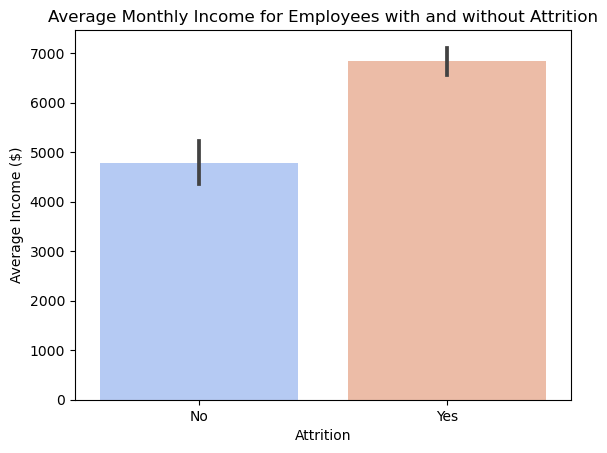

In [132]:
# Visualize average income
sns.barplot(x=df['Attrition'], y=df['MonthlyIncome'], estimator='mean', palette='coolwarm')
plt.title('Average Monthly Income for Employees with and without Attrition')
plt.ylabel('Average Income ($)')
plt.xlabel('Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

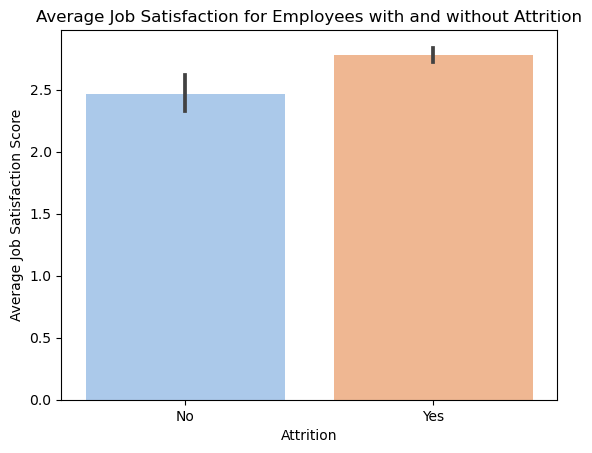

In [134]:
# Visualize job satisfaction
sns.barplot(x=df['Attrition'], y=df['JobSatisfaction'], estimator='mean', palette='pastel')
plt.title('Average Job Satisfaction for Employees with and without Attrition')
plt.ylabel('Average Job Satisfaction Score')
plt.xlabel('Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [153]:

# Group by Department and compute metrics
department_summary = df.groupby('Department').agg(
    average_attrition_rate=('Attrition', 'mean'),
    average_job_satisfaction=('JobSatisfaction', 'mean'),
    average_monthly_income=('MonthlyIncome', 'mean'),
    employee_count=('Attrition', 'size')
).reset_index()

# Group by Job Role and compute metrics
role_summary = df.groupby('JobRole').agg(
    average_attrition_rate=('Attrition', 'mean'),
    average_job_satisfaction=('JobSatisfaction', 'mean'),
    average_monthly_income=('MonthlyIncome', 'mean'),
    employee_count=('Attrition', 'size')
).reset_index()

#Display aggregated summary:
print("Department Summary:\n", department_summary)
print("Role Summary:\n", role_summary)

Department Summary:
                Department  average_attrition_rate  average_job_satisfaction  \
0         Human Resources                0.190476                  2.603175   
1  Research & Development                0.138398                  2.726327   
2                   Sales                0.206278                  2.751121   

   average_monthly_income  employee_count  
0             6654.507937              63  
1             6281.252862             961  
2             6959.172646             446  
Role Summary:
                      JobRole  average_attrition_rate  \
0  Healthcare Representative                0.068702   
1            Human Resources                0.230769   
2      Laboratory Technician                0.239382   
3                    Manager                0.049020   
4     Manufacturing Director                0.068966   
5          Research Director                0.025000   
6         Research Scientist                0.160959   
7            Sales Exec

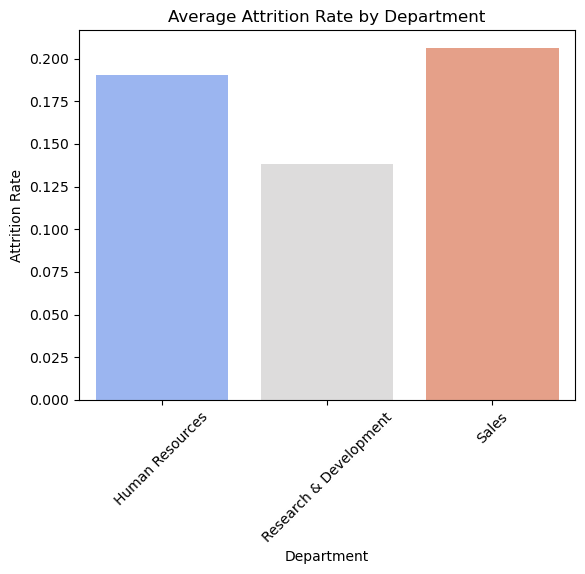

In [155]:
# Plot average attrition rate by department
sns.barplot(data=department_summary, x='Department', y='average_attrition_rate', palette='coolwarm')
plt.title('Average Attrition Rate by Department')
plt.ylabel('Attrition Rate')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

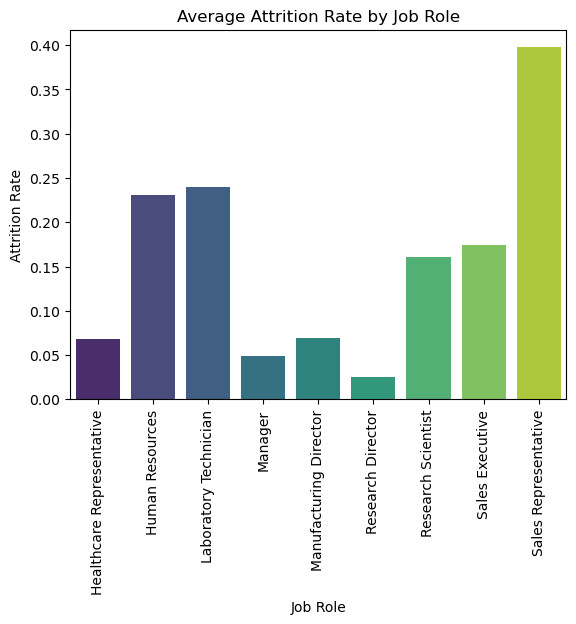

In [157]:
# Plot average attrition rate by job role
sns.barplot(data=role_summary, x='JobRole', y='average_attrition_rate', palette='viridis')
plt.title('Average Attrition Rate by Job Role')
plt.ylabel('Attrition Rate')
plt.xlabel('Job Role')
plt.xticks(rotation=90)
plt.show()

In [167]:
# Calculate Attrition Rate for the entire company:
total_employee = len(df)
attrited_employees = df['Attrition'].sum()
attrition_rate = (attrited_employees / total_employee) * 100

# Calculate Tenure Ratio for each employee (YearsAtCompany / TotalWorkingYears)
df['tenure_ratio'] = df['YearsAtCompany'] / df['TotalWorkingYears']

# Group by Department to calculate Attrition Rate and Tenure Ratio
department_summary = df.groupby('Department').agg(
    total_employees=('Attrition', 'size'),
    total_attrited=('Attrition', 'sum'),
    average_tenure=('YearsAtCompany', 'mean'),
    average_satisfaction=('JobSatisfaction', 'mean'),
    average_income=('MonthlyIncome', 'mean'),
    average_tenure_ratio=('tenure_ratio', 'mean')
).reset_index()

# Calculate attrition rate for each department
department_summary['attrition_rate'] = (department_summary['total_attrited'] / department_summary['total_employees']) * 100

# Group by Job Role to calculate Attrition Rate and Tenure Ratio
role_summary = df.groupby('JobRole').agg(
    total_employees=('Attrition', 'size'),
    total_attrited=('Attrition', 'sum'),
    average_tenure=('YearsAtCompany', 'mean'),
    average_satisfaction=('JobSatisfaction', 'mean'),
    average_income=('MonthlyIncome', 'mean'),
    average_tenure_ratio=('tenure_ratio', 'mean')
).reset_index()

# Calculate attrition rate for each job role
role_summary['attrition_rate'] = (role_summary['total_attrited'] / role_summary['total_employees']) * 100

# Display the results
print("Department Summary with Calculated Fields:\n", department_summary)
print("\nJob Role Summary with Calculated Fields:\n", role_summary)

Department Summary with Calculated Fields:
                Department  total_employees  total_attrited  average_tenure  \
0         Human Resources               63              12        7.238095   
1  Research & Development              961             133        6.864724   
2                   Sales              446              92        7.284753   

   average_satisfaction  average_income  average_tenure_ratio  attrition_rate  
0              2.603175     6654.507937              0.682773       19.047619  
1              2.726327     6281.252862              0.672590       13.839750  
2              2.751121     6959.172646              0.706116       20.627803  

Job Role Summary with Calculated Fields:
                      JobRole  total_employees  total_attrited  average_tenure  \
0  Healthcare Representative              131               9        8.374046   
1            Human Resources               52              12        5.326923   
2      Laboratory Technician         

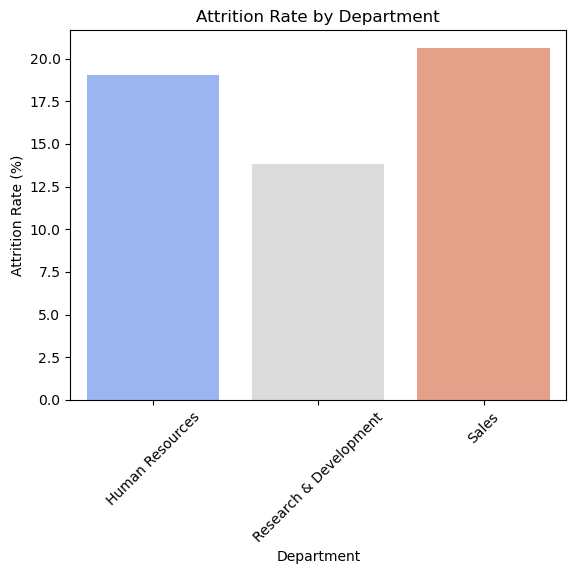

In [169]:
# Plot Attrition Rate by Department
sns.barplot(data=department_summary, x='Department', y='attrition_rate', palette='coolwarm')
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

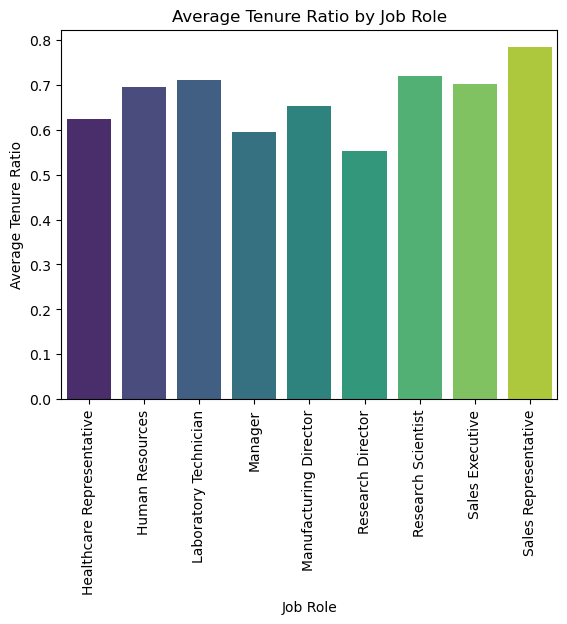

In [171]:
# Plot Average Tenure Ratio by Job Role
sns.barplot(data=role_summary, x='JobRole', y='average_tenure_ratio', palette='viridis')
plt.title('Average Tenure Ratio by Job Role')
plt.ylabel('Average Tenure Ratio')
plt.xlabel('Job Role')
plt.xticks(rotation=90)
plt.show()

In [179]:
# Create new columns for demographics grouping
df['age_group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Summarizing attrition by department
pivot_department = df.pivot_table(
    index='Department',
    values=['Attrition', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany'],
    aggfunc={'Attrition': 'mean', 'MonthlyIncome': 'mean', 'JobSatisfaction': 'mean', 'YearsAtCompany': 'mean'}
).rename(columns={
    'Attrition': 'Attrition Rate',
    'MonthlyIncome': 'Avg Income',
    'JobSatisfaction': 'Avg Satisfaction',
    'YearsAtCompany': 'Avg Tenure'
}).reset_index()

# Summarizing attrition by job role
pivot_role = df.pivot_table(
    index='JobRole',
    values=['Attrition', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany'],
    aggfunc={'Attrition': 'mean', 'MonthlyIncome': 'mean', 'JobSatisfaction': 'mean', 'YearsAtCompany': 'mean'}
).rename(columns={
    'Attrition': 'Attrition Rate',
    'MonthlyIncome': 'Avg Income',
    'JobSatisfaction': 'Avg Satisfaction',
    'YearsAtCompany': 'Avg Tenure'
}).reset_index()

# Summarizing attrition by age group
pivot_age = df.pivot_table(
    index='age_group',
    values=['Attrition', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany'],
    aggfunc={'Attrition': 'mean', 'MonthlyIncome': 'mean', 'JobSatisfaction': 'mean', 'YearsAtCompany': 'mean'}
).rename(columns={
    'Attrition': 'Attrition Rate',
    'MonthlyIncome': 'Avg Income',
    'JobSatisfaction': 'Avg Satisfaction',
    'YearsAtCompany': 'Avg Tenure'
}).reset_index()

# Export pivot tables to Excel
with pd.ExcelWriter("Employee_Attrition_Summary.xlsx") as writer:
    pivot_department.to_excel(writer, sheet_name="Department Summary", index=False)
    pivot_role.to_excel(writer, sheet_name="Job Role Summary", index=False)
    pivot_age.to_excel(writer, sheet_name="Age Group Summary", index=False)

print("Pivot tables have been successfully exported to 'Employee_Attrition_Summary.xlsx'")

Pivot tables have been successfully exported to 'Employee_Attrition_Summary.xlsx'


In [183]:
# Group data by attrition status and compute statistical summaries
attrition_summary = df.groupby('Attrition').agg(
    average_income=('MonthlyIncome', 'mean'),
    average_job_satisfaction=('JobSatisfaction', 'mean'),
    average_work_life_balance=('WorkLifeBalance', 'mean'),
    average_tenure=('YearsAtCompany', 'mean'),
    count=('Attrition', 'size')
).reset_index()

# Rename attrition values for better readability
attrition_summary['Attrition'] = attrition_summary['Attrition'].map({1: 'Yes', 0: 'No'})

# Display the statistical summaries
print("Statistical Summary by Attrition Status:")
print(attrition_summary)


Statistical Summary by Attrition Status:
  Attrition  average_income  average_job_satisfaction  \
0        No     6832.739659                  2.778589   
1       Yes     4787.092827                  2.468354   

   average_work_life_balance  average_tenure  count  
0                   2.781022        7.369019   1233  
1                   2.658228        5.130802    237  


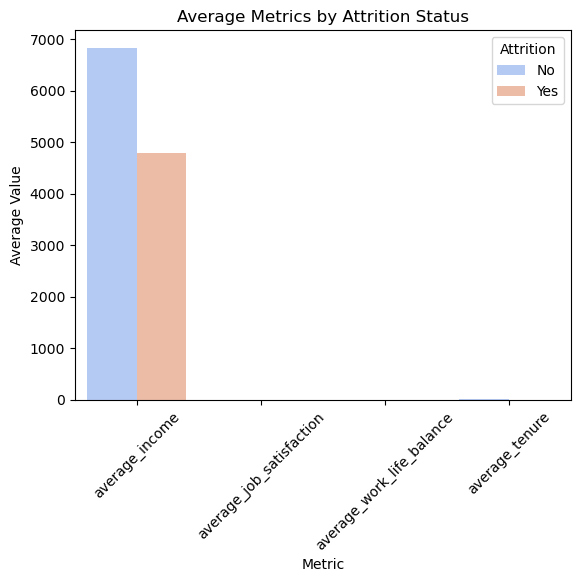

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data for visualization
melted_summary = attrition_summary.melt(
    id_vars='Attrition', 
    value_vars=['average_income', 'average_job_satisfaction', 'average_work_life_balance', 'average_tenure'],
    var_name='Metric', 
    value_name='Value'
)

# Create a barplot
sns.barplot(data=melted_summary, x='Metric', y='Value', hue='Attrition', palette='coolwarm')
plt.title('Average Metrics by Attrition Status')
plt.xticks(rotation=45)
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.legend(title='Attrition')
plt.show()